In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pds
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import statistics

# Chargement des données
try:
    df = pd.read_csv('./train.csv')
    print("Données chargées avec succès.")
except FileNotFoundError:
    print("Erreur : Le fichier 'train.csv' est introuvable.")

Données chargées avec succès.


In [12]:
# 1. Suppression des colonnes non informatives pour le modèle
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# 2. Nettoyage des lignes avec des valeurs manquantes critiques (hors Age)
df = df.dropna(subset=['Embarked', 'Fare'])

# 3. Encodage : Sexe (0: Homme, 1: Femme)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 4. Encodage : Embarked (Création de variables dummy)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [13]:
# --- Préparation des données pour le clustering ---
# On exclut 'Survived' (le target) et 'Age' (ce qu'on cherche) des features de clustering
features_clustering = [col for col in df.columns if col not in ['Age', 'Survived']]

df_age_connu = df[df['Age'].notnull()].copy()
df_age_manquant = df[df['Age'].isnull()].copy()

# --- Mise à l'échelle (Standardisation) ---
scaler = StandardScaler()
X_connu_scaled = scaler.fit_transform(df_age_connu[features_clustering])
X_manquant_scaled = scaler.transform(df_age_manquant[features_clustering])

# --- Entraînement du K-Means ---
K_optimal = 10  # Vous pouvez ajuster ce nombre
kmeans = KMeans(n_clusters=K_optimal, random_state=42, n_init=10)
df_age_connu['Cluster'] = kmeans.fit_predict(X_connu_scaled)

# --- Calcul des moyennes d'âge par cluster ---
moyenne_age_par_cluster = df_age_connu.groupby('Cluster')['Age'].mean()
print("Moyennes d'âge par cluster calculées.")

# --- Prédiction et Imputation ---
clusters_predits = kmeans.predict(X_manquant_scaled)
df_age_manquant['Age'] = [moyenne_age_par_cluster[c] for c in clusters_predits]

# --- Réassemblage du DataFrame final ---
df_final = pd.concat([df_age_connu.drop(columns='Cluster'), df_age_manquant])
df_final = df_final.sort_index()

print(f"Imputation terminée. Valeurs manquantes restantes : {df_final['Age'].isnull().sum()}")

c:\Users\louis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Moyennes d'âge par cluster calculées.
Imputation terminée. Valeurs manquantes restantes : 0


In [14]:
df_final

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,False,True
1,1,1,1,38.000000,1,0,71.2833,False,False
2,1,3,1,26.000000,0,0,7.9250,False,True
3,1,1,1,35.000000,1,0,53.1000,False,True
4,0,3,0,35.000000,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,False,True
887,1,1,1,19.000000,0,0,30.0000,False,True
888,0,3,1,25.947073,1,2,23.4500,False,True
889,1,1,0,26.000000,0,0,30.0000,False,False


In [15]:
df=df_final
X = df.drop('Survived', axis=1)
Y = df['Survived']
features = ["Pclass","Age","SibSp","Parch","Fare"]
scaler = MinMaxScaler()

X_normalized = X.copy()
X_normalized[features] = scaler.fit_transform(X[features])
X_normalized
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y,test_size=0.3,random_state=42)

Meilleurs hyperparamètres trouvés : {'C': 10, 'gamma': 4, 'kernel': 'rbf'}
Meilleur score : 0.8359870967741936


,param_C,param_gamma,mean_test_score,std_test_score,rank_test_score
25,10,4,0.835987,0.019010,1
26,10,5,0.835987,0.019682,1
31,10,10,0.834400,0.018137,3
30,10,9,0.834400,0.018137,3
33,100,1,0.834361,0.022291,5
29,10,8,0.832787,0.015729,6
28,10,7,0.832774,0.014127,7
27,10,6,0.831174,0.017051,8
38,100,6,0.831161,0.017902,9
35,100,3,0.829574,0.018021,10


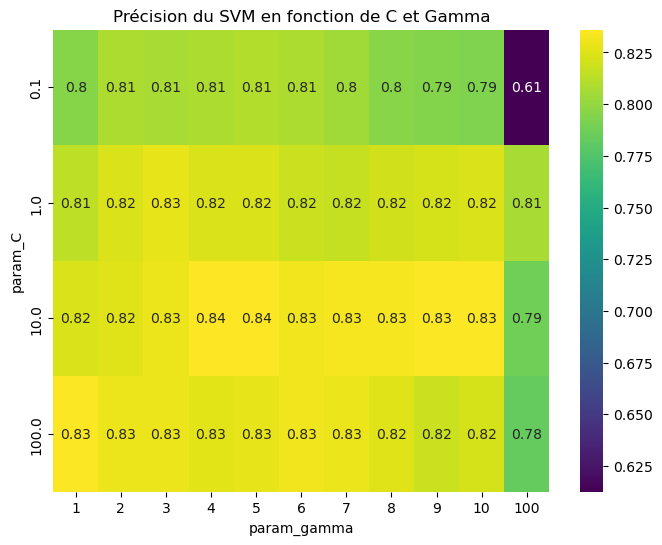

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV # Pour trouver les meilleurs hyperparamètres

# 1. Définir le modèle
svc_model = SVC(random_state=42)

# 2. Définir la grille des hyperparamètres à tester
# C: Pénalité pour les erreurs (généralement 0.1, 1, 10, 100)
# gamma: Influence du noyau RBF (généralement 'scale', 'auto', ou des valeurs numériques)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],
    'gamma': [1,2,3,4,5,6,7,8,9,10,100]
}

# 3. Utiliser la Recherche par grille (Grid Search)
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')

# 4. Entraîner le modèle
# Assurez-vous que X_train est mis à l'échelle !
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)
print("Meilleur score :", grid_search.best_score_)
import pandas as pd

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Sélectionner uniquement les colonnes intéressantes pour la lecture
# (Paramètres et score moyen de test)
columns_to_show = ['param_C', 'param_gamma', 'mean_test_score', 'std_test_score', 'rank_test_score']
display(results_df[columns_to_show].sort_values(by='rank_test_score'))

import seaborn as sns
import matplotlib.pyplot as plt

# Pivot pour préparer les données de la heatmap
pivot_table = results_df.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title("Précision du SVM en fonction de C et Gamma")
plt.show()

In [17]:
from sklearn.metrics import accuracy_score

predictions_y=grid_search.predict(X_test)
# Étape 2A : Calculer le score d'accuracy
accuracy = accuracy_score(y_test, predictions_y)

print(f"L'Accuracy de l'arbre sur le jeu de test est : {accuracy:.4f}")


L'Accuracy de l'arbre sur le jeu de test est : 0.7940


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Étape 2B : Matrice de Confusion
matrice_conf = confusion_matrix(y_test, predictions_y)
print("\nMatrice de Confusion :")
print(matrice_conf)

# Étape 2C : Rapport de Classification (Précision, Rappel, F1-Score)
rapport_classif = classification_report(y_test, predictions_y)
print("\nRapport de Classification :")
print(rapport_classif)



Matrice de Confusion :
[[147  20]
 [ 35  65]]

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       167
           1       0.76      0.65      0.70       100

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267



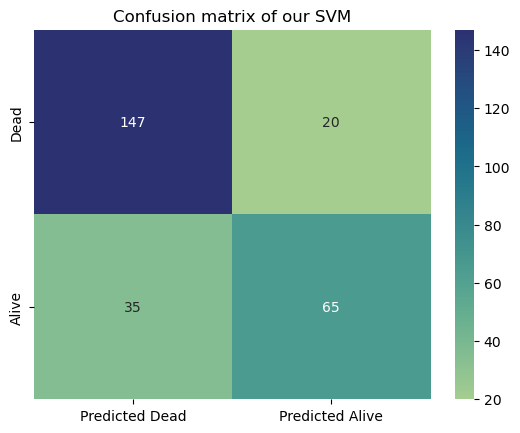

In [19]:
sns.heatmap(matrice_conf, annot=True, fmt="d", cmap="crest", xticklabels=['Predicted Dead','Predicted Alive'], yticklabels=[
    'Dead','Alive'])
plt.title("Confusion matrix of our SVM")
plt.show()

In [20]:
#Evaluation avec les autres indicateurs

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_y))
report_dict = classification_report(
    y_test,
    predictions_y,
    output_dict=True
)

df_report = pds.DataFrame(report_dict).transpose()

df_report = df_report.round(6)

df_report

#Cross-validation

from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics
scoring = ['accuracy', 'precision_macro', 'precision_weighted', 'recall_macro', 'recall_weighted', 'f1_macro', 'f1_weighted']
cv = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
scores = cross_validate(grid_search, X_normalized, Y , scoring=scoring,
                        cv=cv, return_train_score=False)

scores.keys()

print('Global accuracy over all folds: %0.6f (+/- %0.6f)'
      % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))

print('For each metric, list the score values on each fold:')
for metric in sorted(scores.keys()):
    print(
        str(['{:.6f}'.format(value) for value in scores[metric]])
        + ' ' + metric
    )

df_scores = pds.DataFrame({
    'Accuracy': scores['test_accuracy'],
    'Precision (weighted)': scores['test_precision_weighted'],
    'Recall (weighted)': scores['test_recall_weighted'],
    'F1 (weighted)': scores['test_f1_weighted']
})

df_scores.index = [f'Fold {i+1}' for i in range(len(df_scores))]
df_scores.loc['Mean'] = df_scores.mean()
df_scores.loc['Std'] = df_scores.std() 

df_scores = df_scores.round(6)

df_scores

#Copier-coller directement dans canva

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       167
           1       0.76      0.65      0.70       100

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

Global accuracy over all folds: 0.825621 (+/- 0.023361)
For each metric, list the score values on each fold:
['4.471085', '4.694539', '3.963836', '3.878708', '4.311990'] fit_time
['0.013139', '0.015229', '0.017293', '0.009306', '0.015972'] score_time
['0.831461', '0.831461', '0.831461', '0.831461', '0.802260'] test_accuracy
['0.809856', '0.815735', '0.802661', '0.811441', '0.778473'] test_f1_macro
['0.824979', '0.828437', '0.820449', '0.825938', '0.795288'] test_f1_weighted
['0.846250', '0.830460', '0.873249', '0.841422', '0.808590'] test_precision_macro
['0.838287', '0.831138', '0.854578', '0.835768', '0.805130'] test_precision_weighted
['0.796257', '0.807487', '0

,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted)
Fold 1,0.831461,0.838287,0.831461,0.824979
Fold 2,0.831461,0.831138,0.831461,0.828437
Fold 3,0.831461,0.854578,0.831461,0.820449
Fold 4,0.831461,0.835768,0.831461,0.825938
Fold 5,0.802260,0.805130,0.802260,0.795288
Mean,0.825621,0.832980,0.825621,0.819018
Std,0.011680,0.016009,0.011680,0.012143
